<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el método de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.

https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv



3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [8]:
import numpy as np
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt



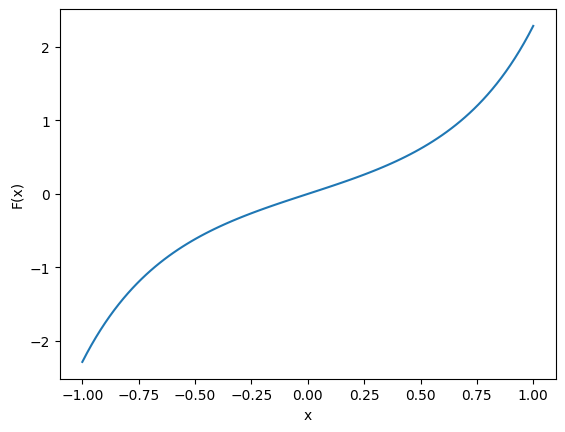

In [17]:
def diff(f, x, h):

  derivada = ((f(x+h)-f(x-h))/(2*h))
  return derivada

f = lambda x: np.exp((x**2))* np.sin(x)
x = np.linspace(-1,1,100)

plt.figure()
plt.ylabel("F(x)")
plt.xlabel("x")
plt.plot(x,f(x))

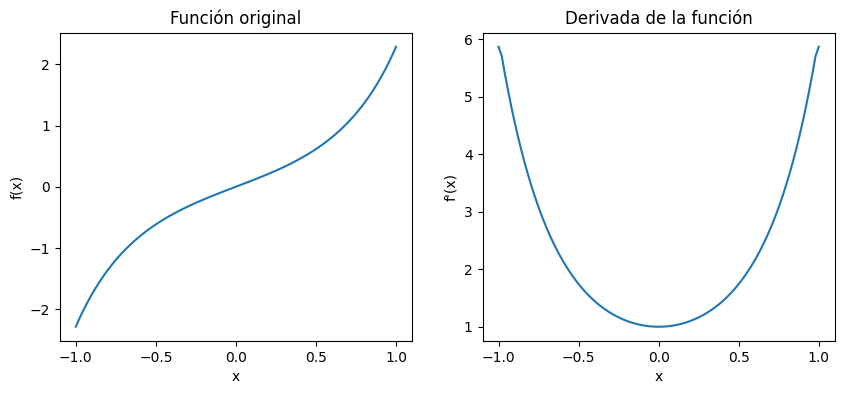

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x_ = np.linspace(-1, 1, 100)
f_x = f(x_)
derivada = np.gradient(f_x, x_)
fig, axs = plt.subplots(figsize=(10, 4), ncols=2, nrows=1)
ax = axs.flatten()
ax[0].plot(x, f_x)
ax[0].set_ylabel("f(x)")
ax[0].set_xlabel("x")
ax[0].set_title("Función original")
ax[1].plot(x, derivada)
ax[1].set_ylabel("f'(x)")
ax[1].set_xlabel("x")
ax[1].set_title("Derivada de la función")
plt.show()


In [23]:
x = sp.Symbol("x")
f1 = lambda x: sp.exp((x**2))* sp.sin(x)
f_ = sp.lambdify("x", f1(x), "numpy")

f1(x)
dif = sp.diff(f1(x),x,1)
dif

     ⎛ 2⎞           ⎛ 2⎞       
     ⎝x ⎠           ⎝x ⎠       
2⋅x⋅ℯ    ⋅sin(x) + ℯ    ⋅cos(x)

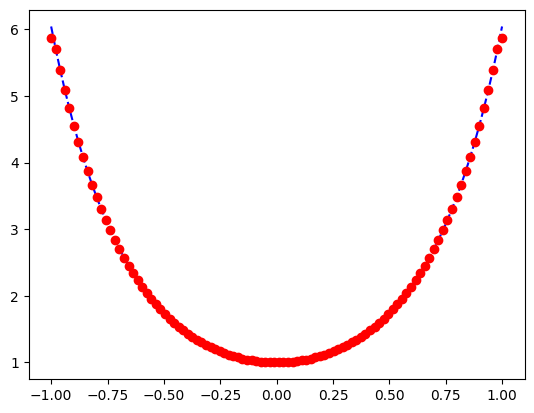

In [26]:


d1 = sp.lambdify("x", dif, "numpy")
f = lambda x: np.exp((x**2))* np.sin(x)
x1 = np.linspace(-1,1,100)
x = np.linspace(-1,1, 100)
plt.plot(x, d1(x),"b--")
plt.plot(x1, derivada, "ro")

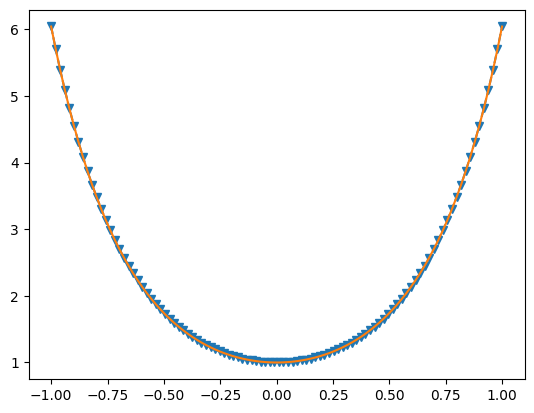

In [34]:
def Diff_c(f, x, h):

  derivada = ((f(x+h)-f(x-h))/(2*h))
  return derivada
y = sp.Symbol("y")

def D_simbolica(f1, y, orden):
  y = sp.Symbol("y")
  d_1 = sp.diff(f1(y),y,orden)
  d1 = sp.lambdify("y", d_1, "numpy")
  return d1

x = np.linspace(-1,1,100)
derivada = Diff_c(f,x,h=1E-2)  #numpy
ds = D_simbolica(f1,y,1)(x)  #symbol


plt.plot(x,derivada, "v--")
plt.plot(x,ds)

3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [56]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [57]:
sp.init_printing()

z = sp.Symbol("z")
k = sp.Symbol("k")
q= sp.Symbol("q_tot")
R = sp.Symbol("R")
V = sp.Symbol("V")

V = k * q/ sp.sqrt(z**2 + R**2)
V

   k⋅qₜₒₜ   
────────────
   _________
  ╱  2    2 
╲╱  R  + z  

In [58]:
k_Cou = 8.9875517923E9
R1 = 0.0001
z1 = 0.0001

E= -sp.diff(V, z)
Ez = E / (k * q )
E_f = sp.lambdify((z, k, R, q), Ez.subs({R: R1}), modules="numpy")

E_cal = E_f(z1, k_Cou, R1, 1)

print(f"Campo electrico para z = 0.1 mm es = {(E_cal)}")


Campo electrico para z = 0.1 mm es = 35355339.05932738


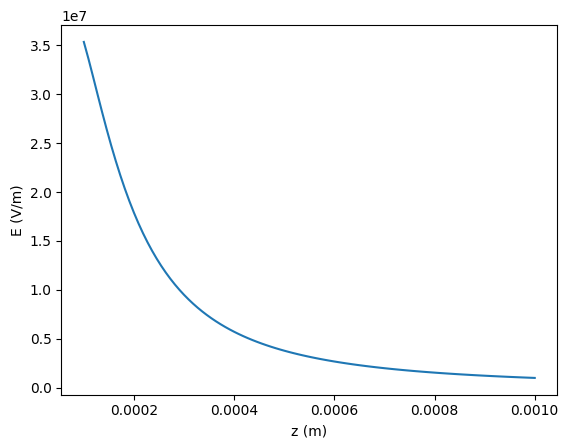

In [63]:
z_m = np.linspace(0.0001, 0.001, 100)

Ez_m = E_f(z_m, k_Cou, R1, 1)


plt.plot(z_m, Ez_m)
plt.xlabel("z (m)")
plt.ylabel("E (V/m)")
plt.show()
